In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import scipy.stats

In [91]:
from os import listdir
from os.path import isfile, join

mypath = "./Data/"
fileIds = [(f.split('.')[0], mypath+f) for f in listdir(mypath) if isfile(join(mypath, f))]
# fileIds = [f.split('.')[0] for f in listdir(mypath) if isfile(join(mypath, f))]

In [93]:
df = pd.DataFrame(columns=['id','path', 'roi', 'hitrate'])
for id, path in fileIds:
    df = pd.concat([df, pd.DataFrame({'id':id, 'path':path, 'roi':None,  'hitrate':None}, index=[0])])

In [104]:
df[['id', 'path']].iloc[0]

id                 1013219
path    ./Data/1013219.csv
Name: 0, dtype: object

In [135]:
df

,id,path,roi,hitrate
0,1013219,./Data/1013219.csv,0.001029,0.862022
0,1016066,./Data/1016066.csv,0.005409,0.228395
0,1016910,./Data/1016910.csv,0.014687,0.84
0,1016917,./Data/1016917.csv,0.096876,0.864078
0,1018646,./Data/1018646.csv,0.00049,0.767888
...,...,...,...,...
0,987229,./Data/987229.csv,0.028434,0.872146
0,993239,./Data/993239.csv,0.000675,0.611963
0,993292,./Data/993292.csv,0.000343,0.712705
0,995747,./Data/995747.csv,0.008803,0.941038


In [ ]:
for i in range(0, len(df)):
    # print(df[ 'path'].iloc[i])
    temp_df = pd.read_csv(df[ 'path'].iloc[i], delimiter=";", index_col=['Time'])
    roi, hitrate = roi_hitrate(temp_df)
    df['roi'].iat[i] = roi
    df['hitrate'].iat[i] = hitrate
    # pass

In [161]:
good_df = pd.read_csv("Data/798045.positions.csv", delimiter=";", index_col=['Time'])
bad_df = pd.read_csv("Data/566161.positions.csv", delimiter=";", index_col=['Time'])

In [153]:
import scipy.stats
# test_data["Balance"] = test_data.profit.cumsum()
# Return = test_data["Balance"].pct_change().dropna().values
# SR =(np.mean(Return[:i])/np.std(Return[:i]))
# score = scipy.stats.norm(0, 1).cdf(SR)
# score

In [159]:
def roi_hitrate(df):
    df.Commission.fillna(0, inplace = True)
    df.Swap.fillna(0, inplace = True)
    
    # Hitrate
    win_rate = len(df[(df.Profit > 0) & ((df.Type == 'Sell') | (df.Type == 'Buy'))]) 
    total_rate = len(df[(df.Type == 'Sell') | (df.Type == 'Buy')]) 
    if total_rate == 0:
        hitrate = 0
    else:
        hitrate = win_rate / total_rate

    # Payoff    
    net_profit =   df[(df.Profit+df.Swap+df.Commission > 0) & ((df.Type == 'Sell') | (df.Type == 'Buy'))]['Profit'].sum() 
    net_loss =  df[(df.Profit+df.Swap+df.Commission < 0) & ((df.Type == 'Sell') | (df.Type == 'Buy'))]['Profit'].sum() 
    if net_loss == 0:
        win_rate = win_rate if win_rate !=0 else 1
        roi =  net_profit /win_rate
    else:
        roi =  (net_profit / abs( net_loss ))/total_rate 
    
    df["Balance"] = df.Profit.cumsum()
    Return = df["Balance"].pct_change().dropna().values
    
    if np.std(Return) == 0:        
        SR =np.mean(Return)             
    else:             
        SR =(np.mean(Return)/np.std(Return))
    score = scipy.stats.norm(0, 1).cdf(SR)
    roi = score
    
    return (roi, hitrate)
    

In [163]:
g_roi, g_hitrate = roi_hitrate(good_df)
b_roi, b_hitrate = roi_hitrate(bad_df)
print('g_ROI: ', g_roi,  ', g_Hitrate: ', g_hitrate)
print('b_ROI: ', b_roi,  ', b_Hitrate: ', b_hitrate)
g_payoff * g_hitrate

g_ROI:  2.3257083176888447 , g_Hitrate:  0.8688305169817634
b_ROI:  0.9024989506659432 , b_Hitrate:  0.45222929936305734


0.30311640948295315

In [246]:
def compare_plot(X, Y):
    circle1 = plt.Circle((0, 0), 0.25, color='#3f54f2')
    circle2 = plt.Circle((0, 0), 0.5, color='#5265f7')
    circle3 = plt.Circle((0, 0), 0.75, color='#6d7dfc')
    circle4 = plt.Circle((0, 0), 1, color='#84c0f5')
    circle5= plt.Circle((0, 0), 5, color='#a4adf5')
    fig = plt.figure(figsize=(5, 5))
    ax = fig.subplots() 
    ax.add_patch(circle5)
    ax.add_patch(circle4)
    ax.add_patch(circle3)
    ax.add_patch(circle2)
    ax.add_patch(circle1)

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)
    plt.scatter(x=X, y=Y, color='r')
    plt.xlabel('Hit Rate')
    plt.ylabel('SharpRatio')
    plt.show()
    # print( circle3)

In [166]:
df = pd.read_csv('statistics.csv', index_col=[0])

In [214]:
df['Profit Trades'] = df['Profit Trades'].str.split( '(').str[1].str.split('%').str[0].astype(float)/100

In [231]:

scipy.stats.norm(0, 1).cdf(df['Sharpe Ratio'])

array([0.64430875, 0.59870633, 0.56355946, ..., 0.46017216, 0.49601064,
       0.49601064])

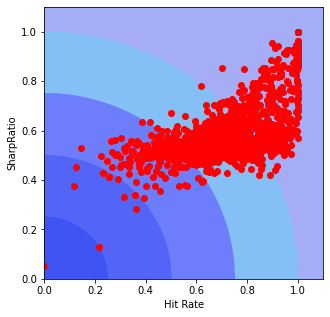

In [247]:

compare_plot( df['Profit Trades'], scipy.stats.norm(0, 1).cdf(df['Sharpe Ratio']))
# compare_plot( df['Profit Trades'], df['Sharpe Ratio'])

In [225]:
df['Profit Factor'].max()

3045.76

In [237]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

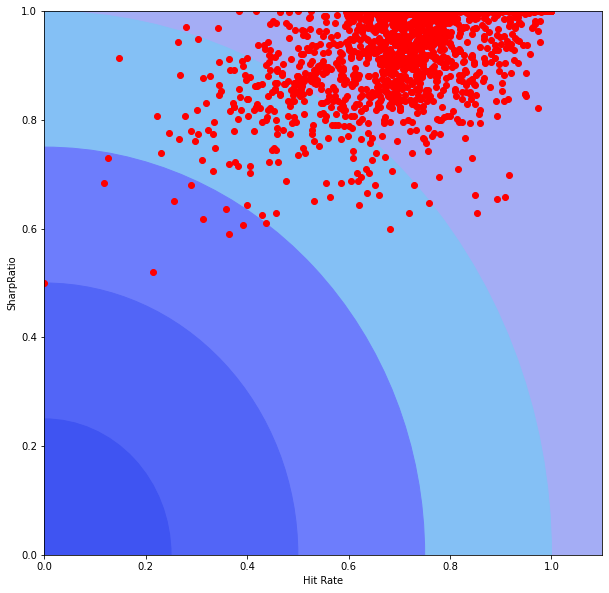

In [243]:
# compare_plot( df['Profit Trades'], df['Profit Factor'])
compare_plot( df['Profit Trades'], scipy.stats.norm(0, 1).cdf(df['Profit Factor']))